# *"Diamonds Are Forever"*
### Assignment 4 - Programming with Python
### By: Shaka Lohardjo

In [2]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Input and Initialization

In [3]:
#importing the dataframe
df = pd.read_csv('diamonds.csv')
#check first 5 columns
df.head()

,serialNo,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#check the last 5 columns
df.tail()

,serialNo,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


#### Notes on unnecessary columns:
- SerialNo - just a unique identifier no need to be included in the analysis.

There is not enough data to determine if any of the variables are irrelevant to determining the price, thus, it will all be kept


In [5]:
#removing serialNo Column - this line cannot be re-run because it will not find serialNo
del df['serialNo'] 
df.head() #print updated columns

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
#datatypes of each column
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Summary Statistics on Continuous Attributes

In [7]:
#Summary statistics on continuous variables
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### *What is the range of carat of the diamonds?*
The range of carat is from 0.2 to 5.01. Based on the quartiles, between 50% and 75% of the whole data set has a carat less than 1

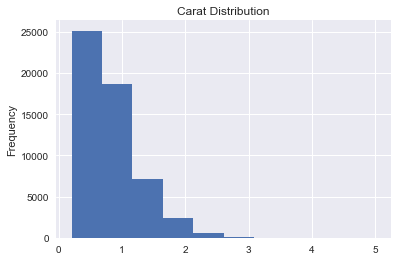

In [8]:
#histogram on carat
df.carat.plot(kind='hist', title='Carat Distribution')

In [9]:
#creating a new filter for carat >= 1
filter1 = (df.carat >= 1.0)
#assigning new filtered data to df
df = df[filter1]

In [10]:
#summary statistics of new filtered dataframe
df.describe()

,carat,depth,table,price,x,y,z
count,19060.000000,19060.000000,19060.000000,19060.000000,19060.000000,19060.000000,19060.000000
mean,1.324311,61.780383,57.912802,8142.114638,6.982582,6.976613,4.307254
std,0.367849,1.594037,2.196731,3919.286505,0.617811,0.718050,0.398329
min,1.000000,43.000000,43.000000,1262.000000,0.000000,0.000000,0.000000
25%,1.030000,61.000000,56.000000,5047.000000,6.500000,6.500000,4.020000
50%,1.200000,61.900000,58.000000,6843.500000,6.790000,6.790000,4.190000
75%,1.510000,62.600000,59.000000,10472.250000,7.360000,7.360000,4.560000
max,5.010000,78.200000,95.000000,18823.000000,10.740000,58.900000,8.060000


In [11]:
#correlation analysis on the dataframe
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.005018,0.052814,0.786873,0.960293,0.823835,0.911478
depth,0.005018,1.000000,-0.292879,-0.067091,-0.131480,-0.125614,0.145664
table,0.052814,-0.292879,1.000000,-0.029104,0.062846,0.042068,-0.030110
price,0.786873,-0.067091,-0.029104,1.000000,0.775749,0.674342,0.723674
x,0.960293,-0.131480,0.062846,0.775749,1.000000,0.850200,0.908381
y,0.823835,-0.125614,0.042068,0.674342,0.850200,1.000000,0.804681
z,0.911478,0.145664,-0.030110,0.723674,0.908381,0.804681,1.000000


### Observations on Correlations:
Focusing primarily on price and the correlation between the other variables. There is a moderately strong positive correlation between carat, x, y and z to price at 0.786873, 0.775749, 0.674342, and 0.724674 respectively. This suggests that the higher the carat the higher the price which makes sense. Then x, y, and z (length, width, depth respectively) relates to the size hence a higher x, y, or z would suggest a larger value for length, width, and depth will increase the price which also makes sense. These factors such as carat, x, y, and z are uncontrollable factors that come with each unique diamond, hence it allows differentiation amongst diamonds to determine the price. 

It is interesting however that depth and table have a low correlation to price and are negative at .067091 and -.029104 respectively. This would suggest that these two variables are not correlated to price due to its low correlation value and its closeness to 0 (0 meaning no correlation). Upon further research, the explanation for this low correlation is due to the factor of uniformity in depth and table across the different diamonds. The explanation is as follows:  

1. Depth, because depth is typically preferred at a set range of 59.5% to 62.9% this allows for diamonds to appear bigger. Assuming that all diamonds want to have the ideal depth, regardless of the quality or any other factor the diamond will be shaped to have a depth falling into the ideal depth range. Thus, regardless of other factors, the depth cannot really determine the price since all diamonds will be shaped to have a somewhat uniform shape within the ideal depth. 
2. Tables, like depth it is also preferred to be at a specific range of 52% to 60%. With the same reasoning as depth, tables would not determine the price because of its quality of standardization, all gemologist will try to make their diamonds to fall into the ideal table range. Thus, it is not a good predictor of price if there is uniformity.

Thus, it could be considered that in order to determine price we can probably remove depth and table as well. 

In [12]:
#removing depth and table
del df['depth']
del df['table']

## Summaries on the discrete attributes

In [13]:
#distribution count of diamonds by color
df.color.value_counts()

G    4031
H    3861
F    2951
I    2779
E    2209
J    1709
D    1520
Name: color, dtype: int64

In [14]:
#distribution count of diamonds by clarity
df.clarity.value_counts()

SI2     5306
SI1     5045
VS2     4018
VS1     2399
VVS2    1076
I1       527
VVS1     435
IF       254
Name: clarity, dtype: int64

In [15]:
#distribution count of diamonds by cut
df.cut.value_counts()

Premium      6191
Ideal        5870
Very Good    4270
Good         1912
Fair          817
Name: cut, dtype: int64

### Observations on Distribution:
#### Distribution of diamonds by color:
The distribution of color is very skewed to G and H at 4031 and 3861 respectively. These two characteristics account for 40% of the dataframe. Moreover, it is lacking in J and D which are the worst and the best which both represent around 17% of the dataframe.
#### Distribution of diamonds by clarity:
The distribution of clarity is heavily skewed to SI2, SI1, VS2 at 5306, 5045, and 4018 respectively. This accounts for a majority of the dataframe at 47%. It is very much lacking in I1, VVS1, and IF, being less than 7% of the highest count of SI2. 
#### Distribution of diamond by cut:
The distribution is heavily skewed to Premium, Ideal and Very Good at 6191, 5870, 4270 respectively. These three categories represent 32%,  30% and 22% respectively of the dataframe.


## Bivariate Analysis and Visualization

In [16]:
#organizing attributes by order (lowest to highest) thus eliminating ordering requirements in the future
df['color'] = df['color'].astype('category', categories=['J','I','H','G','F','E','D'])
df['clarity'] = df['clarity'].astype('category', categories=['I1', 'SI2', 'SI1', 'VS2','VS1','VVS2','VVS1', 'IF'])
df['cut'] = df['cut'].astype('category', categories=['Fair','Good','Very Good','Premium', 'Ideal'])

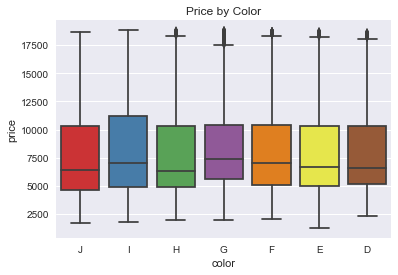

In [17]:
#Box Plot of Price and Color
boxplot1 = sns.boxplot (x='color',y='price', data=df,orient = 'v', palette='Set1')
boxplot1.set(title='Price by Color')

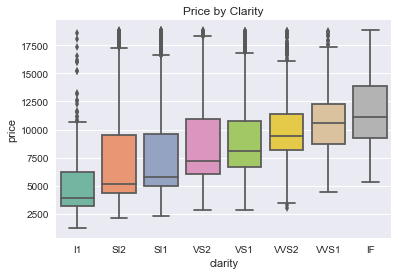

In [20]:
#Box Plot of Price and Clarity
boxplot2 = sns.boxplot(x='clarity',y='price', data=df, orient='v',palette='Set2')
boxplot2.set(title='Price by Clarity')

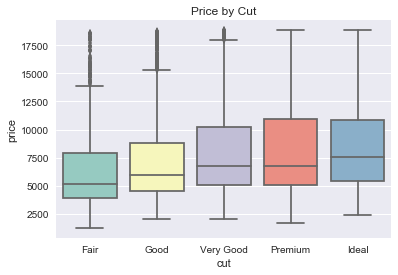

In [21]:
#Box Plot of Price and Cut
boxplot3 = sns.boxplot (x='cut',y='price', data=df,orient='v', palette='Set3')
boxplot3.set(title='Price by Cut')

### Observations on Box Plots:
#### Box plot 1: Color and Price
The box plot for color and price is fairly uniform, the median price are mostly within \$5,000 - \$7,500 mark. This seems to suggest that purely based on color, the price is not that different. Moreover, the 25th and 75th percentiles of each are fairly consistent around \$5,000 and \$11,000 respectively. This makes sense because the colors used in the data set are the top 7 color characteristics of diamond color based on GIA (the gemologist company that assigns the rating). Moreover, these characteristics are either colorless or small amounts of color which can only be determined by using a heavy microscope. To people the colors don't make much difference to the human eye, hence it explains the uniformity across the box plot.
#### Box plot 2: Clarity and Price
The box plot for clarity and price looks like it is steadily increasing as the clarity increases. The box plots are ordered based on worst clarity to the best from left to right. The median price of each clarity is also always increasing. Thus, it can be assumed that as the clarity increases the average price of the diamond is increasing. Moreover, looking at the lower adjacent whiskers, it has a pattern of increasing as the clarity goes up and similar clarity such as SI2, and SI1; VS2 and VS1 has similar lower adjacent whiskers with the exception of VVS2 and VVS1. This would suggest that the lowest price (can be interpreted as a base price by clarity) amongst lower clarity diamonds are fairly uniform by category and each jump to a new category increases the base price (i.e. I1 to SI2 or SI1 to VS2). However, seeing the upper adjacent whiskers seem to vary amongst the different clarity categories with the exception of I1. This may suggest that there are outlier diamonds that can have high prices despite it being of lower quality, and that there are more factors not just clarity that determine the price.
#### Box plot 3: Cut and Price
The box plot for cut and price has a small increasing pattern. The median price is increasing slightly over the different cuts and it follows the pattern of lowest quality cut to highest quality cut (Fair is lowest and Ideal is the highest). Moreover, the lower and upper hinges of the box are going up with the exception of premium upper hinger and ideal upper hinge, this could be attributed to premium having 321 more observances than ideal, however the median price is still higher at ideal which makes sense. The lower adjacent whisker of the boxes are also fairly uniform, while the upper adjacent whisker is increasing with premium and ideal being the highest. 


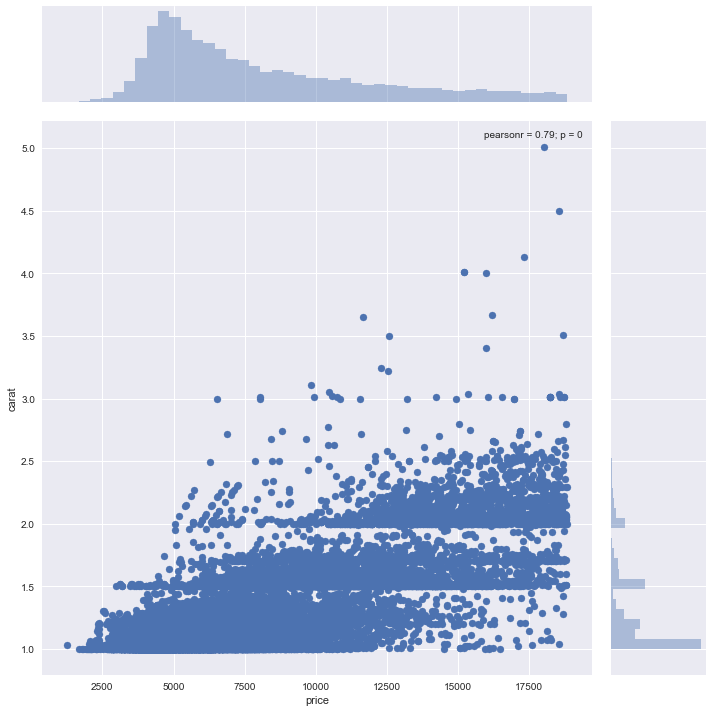

In [22]:
#Scatter plot jointplot of Price vs. Carat
sns.jointplot(data=df, x='price',y='carat',kind ='scatter',size =10)

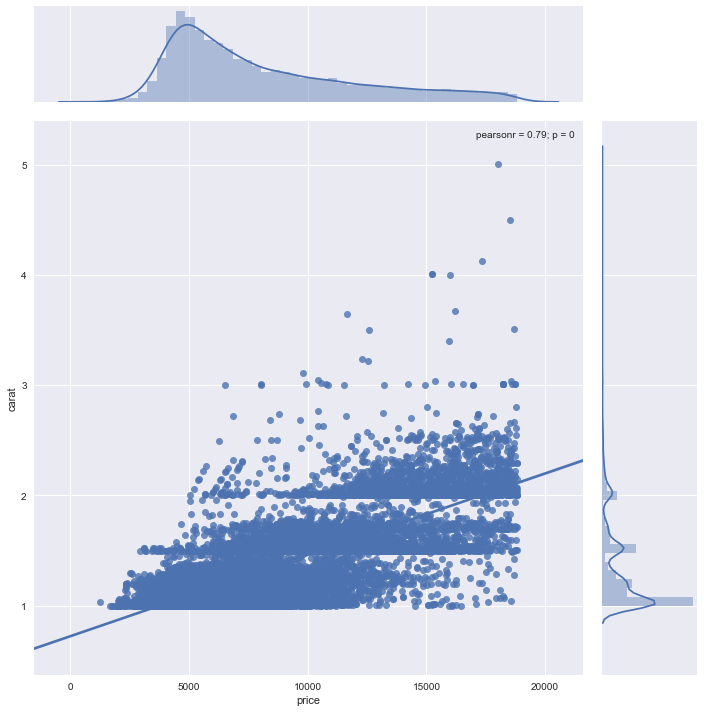

In [23]:
#Regression plot jointplot of Price vs. Carat
sns.jointplot(data=df, x='price',y='carat',kind ='reg',size = 10)

## Multivariate Analysis and Visualization

In [25]:
#Pivot table, summarizing average price by clarity and cut
pt= df.pivot_table(values=['price'],index=['clarity'],columns = ['cut'])
pt

price                                                        
cut             Fair          Good     Very Good       Premium         Ideal
clarity                                                                     
I1       5274.031746   4615.257576   4871.531250   4785.850649   5015.735043
SI2      6693.796721   6761.928934   7321.054795   7590.622492   7482.900593
SI1      6338.316583   7067.493849   7515.619565   7768.951822   7781.314637
VS2      7299.200000   7858.689119   8579.010787   8928.434846   8904.945924
VS1      7536.348485   8228.536946   8982.852590   9359.604497   9385.481651
VVS2     7273.764706   8506.524590   9928.500000   9768.259109  10393.923679
VVS1     9972.250000   8429.600000  10407.939394  10909.443299  11110.195349
IF               NaN  12085.812500  11485.770270  11113.948276  12263.141509

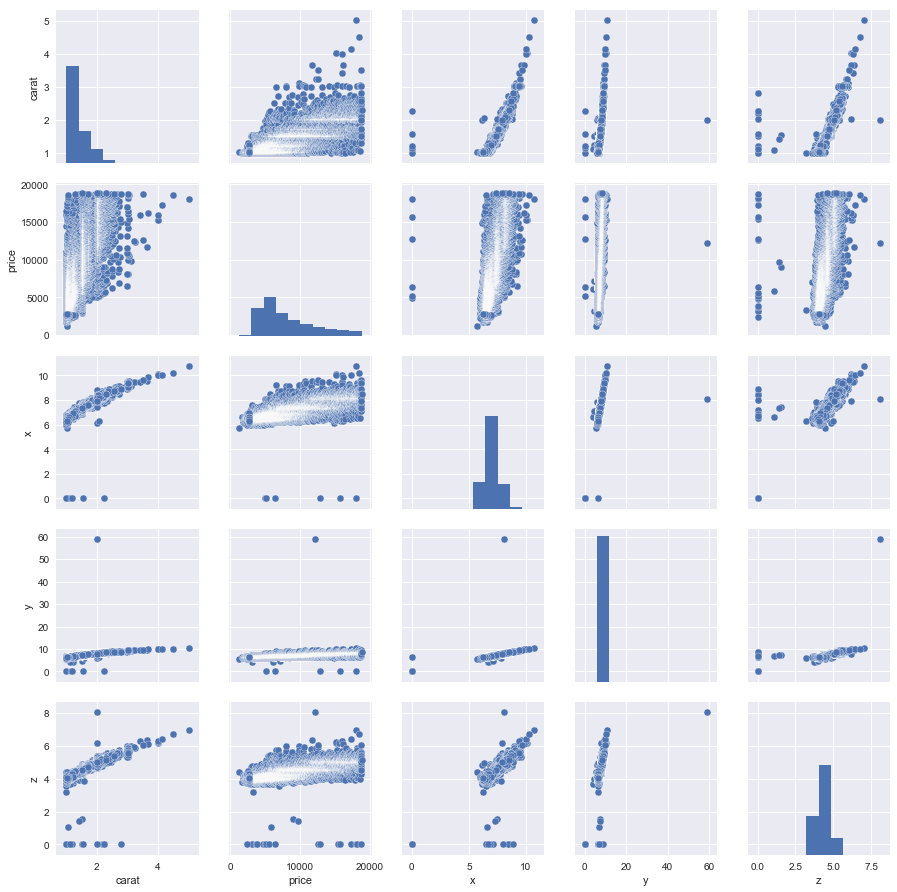

In [26]:
#Pairplot of all numeric variables
sns.pairplot(data=df)

## Final Observations:
The final conclusion is that the attributes (carat, color, clarity, cut, x, y, and z) in the dataframe are most relevant for determining the price. Analyzing the pairplots, there seems to be a positive correlation between the attributes carat, x, y, and z which follow the initial correlation analysis. In the pivot table, comparing cut and clarity shows the trend mentioned in the boxplot analysis, where higher quality categories of clarity and cut has the price also increasing. Throughout the analysis, I tried to remove irrelevant variables. Depth and Table was removed because it had uniformity across the prices regardless of diamond. The uniformity results in all gemologist creating their diamonds to follow the ideal Depth and Table thus, price would not be differentiable. Color would also probably be removed because it also has uniformity. However, I did not remove it because if more datapoints were introduced it may be good for determining price. Diamond color can range from D to Z, while in this dataframe it only considers the top 7 (D to J) which have no difference to the human eye. If the dataframe had datapoints from K to Z perhaps it could be a good determinant for price. I would add more datapoints with examples from colors in K to Z to conclude whether color would be a good determinant of price. 

In [27]:
import datetime
print("\n\n"," Finished execution at ", datetime.datetime.now())



  Finished execution at  2017-12-07 16:57:47.599783
